### Teorema de Bayes

O Naive Bayes é um modelo de classificação probabilístico baseado no Teorema de Bayes, com uma suposição "ingênua" de independência entre os preditores. Em estatística e aprendizado de máquina, é utilizado para uma ampla gama de problemas de classificação, especialmente em tarefas de processamento de linguagem natural (NLP) como classificação de texto e filtragem de spam, mas também em diagnósticos médicos, detecção de sentimentos, e muito mais. Aqui está uma visão geral de como o Naive Bayes é aplicado nesses campos

O fundamento do Naive Bayes é o Teorema de Bayes, que é uma maneira de encontrar a probabilidade de uma hipótese com base em conhecimentos prévios. Matematicamente, é expresso como:

$$ P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)} $$

onde:
- $P(A|B)$ é a probabilidade posterior de $A$ dado $B$,
- $P(B|A)$ é a probabilidade de $B$ dado $A$,
- $P(A)$ é a probabilidade a priori de $A$, e
- $P(B)$ é a probabilidade total de $B$.

Suponha que em uma cidade, 1% da população tenha uma doença rara. Existe um teste para essa doença que possui uma taxa de verdadeiro positivo (sensibilidade) de 99% e uma taxa de verdadeiro negativo (especificidade) de 98%. A taxa de verdadeiro positivo indica a probabilidade de o teste dar positivo caso a pessoa realmente tenha a doença, enquanto a taxa de verdadeiro negativo reflete a probabilidade de o teste dar negativo caso a pessoa não tenha a doença.

Uma pessoa da cidade é selecionada aleatoriamente para realizar o teste, e o resultado é positivo. Qual é a probabilidade dessa pessoa realmente ter a doença?

**Solução**

Para resolver este problema definimos os eventos da seguinte forma:

- $A$: a pessoa tem a doença.
- $B$: o teste da pessoa dá positivo.

Queremos calcular $P(A|B)$, ou seja, a probabilidade de a pessoa ter a doença dado que seu teste deu positivo.

Dados:
- $P(A) = 0.01$ (probabilidade de ter a doença),
- $P(B|A) = 0.99$ (probabilidade de o teste dar positivo se a pessoa tem a doença),
- $P(\neg A) = 0.99$ (probabilidade de não ter a doença),
- $P(B|\neg A) = 0.02$ (probabilidade de o teste dar positivo se a pessoa não tem a doença).

O Teorema de Bayes nos diz que:

$$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$$

Para encontrar $P(B)$, usamos a Lei da Probabilidade Total:

$$P(B) = P(B|A) \cdot P(A) + P(B|\neg A) \cdot P(\neg A)$$

Substituindo os valores conhecidos:

$$P(B) = 0.99 \cdot 0.01 + 0.02 \cdot 0.99$$

Agora, podemos calcular $P(B)$ e, em seguida, $P(A|B)$ utilizando Python:

In [2]:
P_A = 0.01
P_B_given_A = 0.99
P_not_A = 0.99
P_B_given_not_A = 0.02

In [3]:
P_B = P_B_given_A * P_A + P_B_given_not_A * P_not_A
P_A_given_B = (P_B_given_A * P_A) / P_B

In [4]:
print("P(B) = {:.2%}".format(P_B))
print("P(A|B) = {:.2%}".format(P_A_given_B))

P(B) = 2.97%
P(A|B) = 33.33%


Vamos detalhar o significado dos dois resultados:

1. **\(P(B) = 2.97\%\):** Esta é a probabilidade total de um teste dar positivo na população. Isso leva em conta tanto os verdadeiros positivos (pessoas que realmente têm a doença e recebem um resultado de teste positivo) quanto os falsos positivos (pessoas que não têm a doença mas recebem um resultado de teste positivo). Apesar da doença ser muito rara (apenas 1% da população a tem), a probabilidade de um teste positivo aumenta para aproximadamente 2.97% devido à possibilidade de falsos positivos. Isso destaca como a precisão do teste (especificamente, a taxa de falsos positivos) e a prevalência da doença na população afetam a probabilidade de resultados positivos.

2. **\(P(A|B) = 33.33\%\):** Este é o resultado crucial que muitas vezes surpreende as pessoas. Significa que, mesmo se uma pessoa receber um resultado de teste positivo, a probabilidade de ela realmente ter a doença é de apenas 33.33%. Isso pode parecer contra-intuitivo, dada a alta sensibilidade (99%) e especificidade (98%) do teste. No entanto, esse resultado é fortemente influenciado pela baixa prevalência da doença na população (apenas 1%).

A razão para essa aparente discrepância reside no fato de que a quantidade de falsos positivos (resultados positivos em pessoas sem a doença) pode superar a quantidade de verdadeiros positivos quando a doença é rara, mesmo com um teste altamente específico. O Teorema de Bayes nos ajuda a ajustar a probabilidade de ter a doença com base no resultado do teste, levando em conta a prevalência da doença na população.

**Implicações**

Este exemplo demonstra a importância de considerar a prevalência da condição ao interpretar os resultados dos testes. Mesmo um teste altamente preciso pode ter uma taxa significativa de falsos positivos em condições de baixa prevalência, o que pode levar a diagnósticos equivocados se a interpretação dos resultados não levar em conta a prevalência da doença. É por isso que os médicos geralmente usam resultados de testes junto com outras informações clínicas para fazer um diagnóstico.

### Suposição de Independência Naive

A "naividade" do Naive Bayes vem da suposição de que os atributos que descrevem as instâncias são independentes uns dos outros, dado o resultado da classe. Esta suposição simplifica os cálculos, permitindo que o modelo seja treinado e executado rapidamente, mesmo em grandes conjuntos de dados.

$$ P(x_i | y, x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n) = P(x_i | y) $$

para todo $i \neq j$, onde $y$ é a variável da classe.

### Classificação com Naive Bayes

Para classificar um novo ponto de dados com características $x_1, x_2, \dots, x_n$, calculamos a probabilidade posterior para cada classe $y$ e escolhemos a classe com a maior probabilidade. A fórmula para a probabilidade posterior é:

$$ P(y | x_1, x_2, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i | y) $$

A classe escolhida é aquela que maximiza essa probabilidade:

$$ \hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i | y) $$

### Variações do Naive Bayes

Dependendo do tipo de dados de entrada, diferentes versões do Naive Bayes podem ser aplicadas:

- Gaussiano Naive Bayes: usado quando os preditores são variáveis contínuas e supostamente distribuídos normalmente.
- Multinomial Naive Bayes: ideal para quando os dados são contagens ou frequências de eventos. Comumente usado em classificação de texto.
- Bernoulli Naive Bayes: aplicado em situações onde os preditores são variáveis binárias.

### Aplicações em Estatística e Machine Learning

1. Classificação de Texto: Graças à sua simplicidade e eficiência, o Naive Bayes é frequentemente a primeira escolha para classificação de texto, como filtragem de spam e categorização de notícias.

2. Diagnósticos Médicos: Pode ser usado para prever a probabilidade de uma doença com base em sintomas e históricos de saúde dos pacientes.

3. Sistemas de Recomendação: Embora não seja a principal escolha para sistemas de recomendação complexos, pode ser utilizado para criar bases simples de recomendação, baseadas em características do usuário e produtos.

### Vantagens e Desvantagens

**Vantagens:**

Simples e rápido para treinar e prever.
Funciona bem com uma quantidade limitada de dados.
Boa performance em tarefas de classificação multi-classe.

**Desvantagens:**
A suposição de independência é muitas vezes irrealista, o que pode afetar o desempenho.
Pode ser superado por modelos mais complexos em tarefas com relações intrincadas entre atributos.
Apesar de suas limitações, o Naive Bayes continua a ser uma ferramenta poderosa e amplamente utilizada devido à sua simplicidade, eficiência e boa performance em várias aplicações práticas.

### Exemplo de análise de risco

| História do crédito | Dívida | Garantias | Renda anual | Risco |
|---------------------|--------|-----------|-------------|-------|
| Ruim                | Alta   | Nenhuma   | < 15.000    | Alto  |
| Desconhecida        | Alta   | Nenhuma   | >= 15.000 a <= 35.000 | Alto  |
| Desconhecida        | Baixa  | Nenhuma   | >= 15.000 a <= 35.000 | Moderado |
| Desconhecida        | Baixa  | Nenhuma   | < 15.000    | Alto  |
| Desconhecida        | Baixa  | Nenhuma   | > 35.000    | Baixo |
| Ruim                | Baixa  | Adequada  | < 15.000    | Alto  |
| Ruim                | Baixa  | Nenhuma   | > 35.000    | Moderado |
| Boa                 | Baixa  | Adequada  | > 35.000    | Baixo |
| Boa                 | Alta   | Nenhuma   | < 15.000    | Alto  |
| Boa                 | Alta   | Nenhuma   | >= 15.000 a <= 35.000 | Moderado |
| Boa                 | Alta   | Nenhuma   | > 35.000    | Baixo |
| Ruim                | Alta   | Nenhuma   | >= 15.000 a <= 35.000 | Alto  |

| Risco de crédito | História do crédito: Boa | História do crédito: Desconhecida | História do crédito: Ruim | Dívida: Alta | Dívida: Baixa | Garantias: Nenhuma | Garantias: Adequada | Renda anual: < 15000 | Renda anual: >= 15000 e <= 35000 | Renda anual: > 35000 |
|------------------|--------------------------|-----------------------------------|---------------------------|--------------|---------------|--------------------|---------------------|---------------------|----------------------------------|----------------------|
| Alto 6/14        | 1/6                      | 2/6                               | 3/6                       | 4/6          | 2/6           | 6/6                | 0                   | 3/6                 | 2/6                              | 1/6                  |
| Moderado 3/14    | 1/3                      | 1/3                               | 1/3                       | 1/3          | 2/3           | 2/3                | 1/3                 | 0                   | 2/3                              | 1/3                  |
| Baixo 5/14       | 3/5                      | 2/5                               | 0                         | 2/5          | 3/5           | 3/5                | 2/5                 | 0                   | 0                                | 5/5                  |


In [8]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Dados fictícios para as probabilidades condicionais e a priori.
prob_conds = {
    'Alto': {'boa': 0.1, 'desconhecida': 0.3, 'ruim': 0.6, 'alta': 0.7, 'baixa': 0.3, 'nenhuma': 0.8, 'adequada': 0.2, '< 15000': 0.9, '>= 15000 e <= 35000': 0.5, '> 35000': 0.1},
    'Moderado': {'boa': 0.3, 'desconhecida': 0.4, 'ruim': 0.3, 'alta': 0.3, 'baixa': 0.7, 'nenhuma': 0.1, 'adequada': 0.9, '< 15000': 0.05, '>= 15000 e <= 35000': 0.3, '> 35000': 0.65},
    'Baixo': {'boa': 0.6, 'desconhecida': 0.3, 'ruim': 0.1, 'alta': 0.0, 'baixa': 0.7, 'nenhuma': 0.1, 'adequada': 0.9, '< 15000': 0.05, '>= 15000 e <= 35000': 0.2, '> 35000': 0.25}
}

# Probabilidades a priori para cada classe de risco.
prior_probs = {'Alto': 0.2, 'Moderado': 0.3, 'Baixo': 0.5}

# Criamos as caixas de seleção para as características do cliente.
credito_input = widgets.Dropdown(options=['boa', 'desconhecida', 'ruim'], description='Crédito:')
divida_input = widgets.Dropdown(options=['alta', 'baixa'], description='Dívida:')
garantias_input = widgets.Dropdown(options=['nenhuma', 'adequada'], description='Garantias:')
renda_input = widgets.Dropdown(options=['< 15000', '>= 15000 e <= 35000', '> 35000'], description='Renda:')

button = widgets.Button(description="Calcular Risco")
output = widgets.Output()

# Esta função será chamada quando o botão for clicado.
def on_button_clicked(b):
    with output:
        clear_output()
        # Calcula a probabilidade posterior de cada classe de risco usando o Teorema de Bayes.
        post_probs = {}
        for risk in prior_probs:
            post_probs[risk] = (prior_probs[risk] *
                                prob_conds[risk][credito_input.value] *
                                prob_conds[risk][divida_input.value] *
                                prob_conds[risk][garantias_input.value] *
                                prob_conds[risk][renda_input.value])

        # Normaliza as probabilidades para somar 1.
        total_prob = sum(post_probs.values())
        normalized_probs = {risk: (prob / total_prob) for risk, prob in post_probs.items()}
        
        # Identifica a classificação de risco com maior probabilidade.
        max_risk = max(normalized_probs, key=normalized_probs.get)
        print(f"Probabilidades de risco: {normalized_probs}")
        print(f"Classificação de risco: {max_risk}")

# Mostra as caixas de seleção e o botão.
display(credito_input, divida_input, garantias_input, renda_input, button, output)

button.on_click(on_button_clicked)

Dropdown(description='Crédito:', options=('boa', 'desconhecida', 'ruim'), value='boa')

Dropdown(description='Dívida:', options=('alta', 'baixa'), value='alta')

Dropdown(description='Garantias:', options=('nenhuma', 'adequada'), value='nenhuma')

Dropdown(description='Renda:', options=('< 15000', '>= 15000 e <= 35000', '> 35000'), value='< 15000')

Button(description='Calcular Risco', style=ButtonStyle())

Output()

### Classificação com dados desbalanceados

In [9]:
import pandas as pd
import random
import numpy as np

In [10]:
dataset = pd.read_csv('credit_data.csv')

In [11]:
dataset.shape #tamanho da base de dados

(2000, 5)

In [12]:
dataset.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [13]:
dataset.dropna(inplace=True)
dataset.shape

(1997, 5)

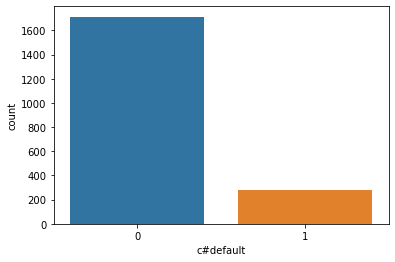

In [14]:
import seaborn as sns
sns.countplot(x=dataset['c#default']);

**Variável Previrosa X**

In [15]:
X = dataset.iloc[:, 1:4].values

In [16]:
X.shape

(1997, 3)

In [17]:
X

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

**Variável Resposta Y**

In [18]:
y = dataset.iloc[:, 4].values

In [19]:
y.shape

(1997,)

In [20]:
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

#### Base de treinamento e teste

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
#20% da base de dados para teste
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.2, stratify = y) 

In [23]:
X_treinamento.shape, y_treinamento.shape

((1597, 3), (1597,))

In [24]:
X_teste.shape, y_teste.shape

((400, 3), (400,))

In [25]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([1714,  283], dtype=int64))

In [26]:
1714 / len(dataset), 283 / len(dataset)

(0.8582874311467201, 0.14171256885327993)

In [27]:
np.unique(y_treinamento, return_counts=True)

(array([0, 1], dtype=int64), array([1371,  226], dtype=int64))

In [28]:
226 / len(y_treinamento)

0.14151534126487164

In [29]:
np.unique(y_teste, return_counts=True)

(array([0, 1], dtype=int64), array([343,  57], dtype=int64))

In [30]:
57 / len(y_teste)

0.1425

#### Classificação com Naïve Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB

In [32]:
modelo = GaussianNB()
modelo.fit(X_treinamento, y_treinamento)

GaussianNB()

In [33]:
previsoes = modelo.predict(X_teste)

In [34]:
previsoes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [35]:
y_teste

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [1]:
#análise de acerto da classificação

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y_teste,previsoes)

0.9375

In [2]:
#criação da matriz de confusão

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
cm = confusion_matrix(y_teste,previsoes)
cm

array([[339,   4],
       [ 21,  36]], dtype=int64)

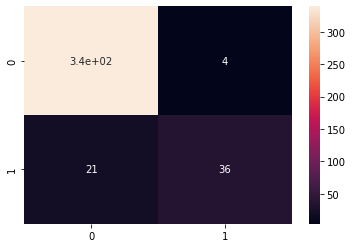

In [40]:
sns.heatmap(cm, annot=True);

In [3]:
(339 + 36) / (339 + 21 + 4 + 36)

0.9375

In [4]:
# Percentual de acerto para pessoas que pagam o empréstimo
339 / (339 + 21)

0.9416666666666667

In [5]:
# Percentual de acerto para pessoas que não pagam o empréstimo
36 / (36 + 4)

0.9

In [6]:
# Perdas: 5.000 reais para cliente que não paga o emprestimo
# Clientes não pagadores: 1.000
1000 * 10 / 100

100.0

In [8]:
100 * 5000 #prejuizo estimado

500000

### Undersampling e Oversampling

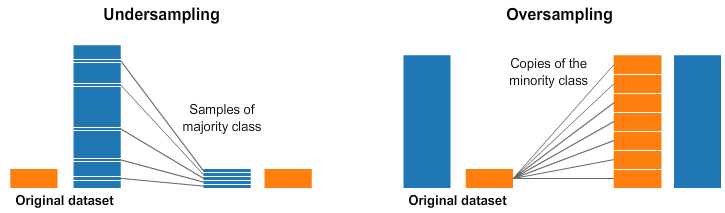

In [10]:
from IPython.display import Image
Image(filename="C://Users//yanks//ESTATÍSTICA - JUPYTER//UDEMY - Curso de Estatística//Estatistica para Ciencia de Dados e Machine Learning//Under_oversampling.png")

**Subamostragem - Tomek Links**

A subamostragem é uma abordagem para equilibrar conjuntos de dados que reduz o tamanho da classe majoritária ao remover algumas de suas instâncias. Uma maneira específica de fazer isso é usando Tomek Links. Um link de Tomek consiste em um par de instâncias muito próximas, mas de classes diferentes. A ideia é que, ao remover as instâncias da classe majoritária que formam um link de Tomek, o conjunto de dados se torna mais balanceado, e as fronteiras entre as classes se tornam mais claras.

Este método é especialmente útil quando as instâncias da classe majoritária e minoritária estão misturadas. Ao eliminar instâncias da classe majoritária que são ambíguas (ou seja, aquelas que formam um link de Tomek), ajuda-se a melhorar a capacidade do classificador de distinguir entre as classes.

**Subamostragem - Smote**

Em contraste com a subamostragem, o SMOTE é uma técnica de sobreamostragem que visa equilibrar o conjunto de dados aumentando o tamanho da classe minoritária. Ele faz isso criando instâncias sintéticas da classe minoritária em vez de simplesmente duplicar instâncias existentes. Para uma instância da classe minoritária, o SMOTE seleciona um de seus k vizinhos mais próximos (também pertencentes à classe minoritária) e gera uma nova instância em algum ponto entre a instância original e seu vizinho.

Esta abordagem pode ajudar a superar o problema de sobreajuste que pode ocorrer com a sobreamostragem simples, proporcionando mais generalização ao treinar o modelo. No entanto, o SMOTE pode também introduzir artificialmente ruído se as classes estiverem muito sobrepostas, já que pode gerar instâncias sintéticas que caem em regiões dominadas pela classe majoritária.

Ambas as técnicas têm seus méritos e podem ser usadas de forma complementar. Enquanto a subamostragem com Tomek Links pode ajudar a limpar as fronteiras entre classes ao remover instâncias potencialmente ruidosas ou ambíguas da classe majoritária, o SMOTE pode aumentar a representatividade da classe minoritária sem causar repetição exata de instâncias, o que pode ser benéfico para a diversidade do conjunto de treinamento.

Em muitos casos, a combinação dessas técnicas — primeiro aplicando subamostragem para remover instâncias ambíguas da classe majoritária e depois aplicando sobreamostragem para reforçar a classe minoritária — pode oferecer um equilíbrio eficaz, melhorando o desempenho do modelo em conjuntos de dados desequilibrados.

**Random Forest**

Agora vamos testar as técnicas de subamostragem e sobreamostragem utilizando outra base de dados, a csv_result-ebay_confianca_completo.csv, que é uma base de dados para prever a confiança de usuários baseado em traços de personalidade extraídos de textos

A classe é o atributo reputation, que pode ser reputação boa ou reputação ruim

O algoritmo Naïve Bayes não tem um bom desempenho nesta base de dados, por isso precisamos utilizar o Random Forest que é um algoritmo baseado em árvores de decisão. A ideia de utilização é a mesma, e no link a seguir você pode verificar a documentação: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [1]:
import pandas as pd
import random
import numpy as np

In [2]:
dataset = pd.read_csv('csv_result-ebay_confianca_completo.csv')

In [3]:
dataset.shape

(5806, 75)

In [4]:
dataset.head()

,feedbacks,reviews,blacklist,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,...,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence,reputation
2,0,49,N,4.181642,0.6,1,2.777591,0.6,0,4.085460,...,0.696359,0.698786,0.756963,0.660119,0.619416,0.746372,0.640073,0.598037,0.828716,Bom
3,0,56,N,4.007042,0.6,0,2.698650,0.6,0,4.187338,...,0.715300,0.664572,0.728806,0.660740,0.588969,0.735915,0.644465,0.603042,0.809379,Bom
4,0,50,N,4.538230,0.7,1,2.298492,0.5,1,5.085833,...,0.720150,0.694678,0.669652,0.627962,0.553523,0.766618,0.655470,0.645042,0.826039,Bom
5,72,0,N,4.692854,0.3,0,2.987231,0.5,0,4.831320,...,0.739793,0.637027,0.697221,0.638587,0.675289,0.752234,0.679661,0.674438,0.813391,Bom
6,76,0,N,4.966753,0.3,0,3.048730,0.5,0,4.725294,...,0.718530,0.616852,0.692761,0.646695,0.677245,0.699785,0.648607,0.616075,0.816841,Bom


In [5]:
dataset['blacklist'] = dataset['blacklist'] == 'S'

C:\Users\yanks\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


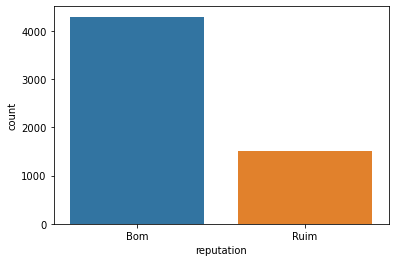

In [6]:
import seaborn as sns
sns.countplot(dataset['reputation']);

In [7]:
len(dataset.columns)

75

In [8]:
X = dataset.iloc[:,0:74].values

In [9]:
X.shape

(5806, 74)

In [10]:
X

array([[0, 49, False, ..., 0.6400725899947721, 0.598037041554872,
        0.828716381071851],
       [0, 56, False, ..., 0.6444645861342442, 0.603041772443901,
        0.8093789692710098],
       [0, 50, False, ..., 0.6554697130298307, 0.6450420335022421,
        0.82603890125472],
       ...,
       [78, 0, False, ..., 0.6974661634054785, 0.6739035045452172,
        0.8320726536961992],
       [95, 0, False, ..., 0.7706773179699052, 0.7100477615788761,
        0.8199238314070743],
       [53, 0, False, ..., 0.6239306346573744, 0.6331205213003834,
        0.7920921058167003]], dtype=object)

In [11]:
y = dataset.iloc[:,74].values

In [12]:
y

array(['Bom', 'Bom', 'Bom', ..., 'Bom', 'Ruim', 'Ruim'], dtype=object)

In [13]:
np.unique(y, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 1507], dtype=int64))

**Base de treinamento e teste**

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.2, stratify = y)

In [16]:
X_treinamento.shape, y_treinamento.shape

((4644, 74), (4644,))

In [17]:
X_teste.shape, y_teste.shape

((1162, 74), (1162,))

**Classificação com Random Forest**

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
modelo = RandomForestClassifier()
modelo.fit(X_treinamento, y_treinamento)

RandomForestClassifier()

In [20]:
previsoes = modelo.predict(X_teste)
from sklearn.metrics import accuracy_score
accuracy_score(previsoes, y_teste)

0.7409638554216867

**Subamostragem (undersampling) - Tomek links**

https://imbalanced-learn.readthedocs.io/en/stable/user_guide.html

In [24]:
from imblearn.under_sampling import TomekLinks

In [25]:
tl = TomekLinks(sampling_strategy='majority')
X_under, y_under = tl.fit_resample(X, y)

In [26]:
X_under.shape, y_under.shape

((5417, 74), (5417,))

In [27]:
np.unique(y, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 1507], dtype=int64))

In [28]:
np.unique(y_under, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([3910, 1507], dtype=int64))

In [29]:
X_treinamento_u, X_teste_u, y_treinamento_u, y_teste_u = train_test_split(X_under, y_under, 
                                                                          test_size = 0.2, stratify = y_under)
X_treinamento_u.shape, X_teste_u.shape

((4333, 74), (1084, 74))

In [30]:
modelo_u = RandomForestClassifier()
modelo_u.fit(X_treinamento_u, y_treinamento_u)
previsoes_u = modelo_u.predict(X_teste_u)
accuracy_score(previsoes_u, y_teste_u)

0.731549815498155

**Sobreamostragem (oversampling) - SMOTE**

In [31]:
from imblearn.over_sampling import SMOTE

In [32]:
smote = SMOTE(sampling_strategy='minority')
X_over, y_over = smote.fit_resample(X, y)

In [33]:
X_over.shape, y_over.shape

((8598, 74), (8598,))

In [34]:
np.unique(y, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 1507], dtype=int64))

In [35]:
np.unique(y_over, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 4299], dtype=int64))

In [36]:
X_treinamento_o, X_teste_o, y_treinamento_o, y_teste_o = train_test_split(X_over, y_over, 
                                                                          test_size = 0.2, stratify = y_over)
X_treinamento_o.shape, X_teste_o.shape

((6878, 74), (1720, 74))

In [37]:
modelo_o = RandomForestClassifier()
modelo_o.fit(X_treinamento_o, y_treinamento_o)
previsoes_o = modelo_o.predict(X_teste_o)
accuracy_score(previsoes_o, y_teste_o)

0.8267441860465117